# Random Forest  on CIFAR-10

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Loading Data & printing shapes

In [2]:
df = pd.read_csv("adult.csv")

## Data exploration
First data visualisation without any pre-processing on it.
Printing 10 first images from the training set. 

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [5]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [6]:
columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
y = df['income']
X = df[columns]

In [7]:
from sklearn import preprocessing,cross_validation,neighbors
import pandas as pd
#split into train and test
split = 0.2
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=split,random_state=21)

C:\Users\Angelo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# RF: Training our model

In [8]:
import random
from sklearn import ensemble
n_samples=len(x_train)
n_samples2=len(x_test)

x=np.array(x_train).reshape(n_samples,-1)
y=np.array(y_train)
#x=X.numpy()
#y=Y.numpy()
print(x.shape)
print(y.shape)
xt=np.array(x_test).reshape(n_samples2,-1)
yt=np.array(y_test)

#xt=X2.numpy()
#yt=Y2.numpy()
print(xt.shape)
print(yt.shape)

(39073, 6)
(39073,)
(9769, 6)
(9769,)


C:\Users\Angelo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
sample_index=random.sample(range(len(x)),int(len(x)/5))
valid_index=[i for i in range(len(x)) if i not in sample_index]
print(len(sample_index))
print(len(valid_index))

7814
31259


In [10]:
sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]
print(len(sample_images))
print(len(valid_images))

7814
31259


In [11]:
sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

In [12]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['log2', 'sqrt']}


In [13]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = ensemble.RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, refit='AUC', return_train_score=True, n_jobs = -1)
# Fit the random search model
rf_random.fit(sample_images, sample_target)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['log2', 'sqrt']},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring=None, verbose=0)

In [14]:
print("Best estimator found by grid search:")
print(rf_random.best_estimator_)

Best estimator found by grid search:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [15]:
n_tree=[100,400,700,1000,1300,1600,2000]
ascore=[]
for n in n_tree:
    classifier=ensemble.RandomForestClassifier(n_estimators=n,max_features="sqrt")
    classifier.fit(sample_images,sample_target)
    ascore.append(classifier.score(valid_images,valid_target))
print('Scores:',ascore)


Scores: [0.8093988931187818, 0.8093669023321284, 0.8086950958124061, 0.8093349115454749, 0.8090789852522473, 0.8099107457052369, 0.8093029207588215]


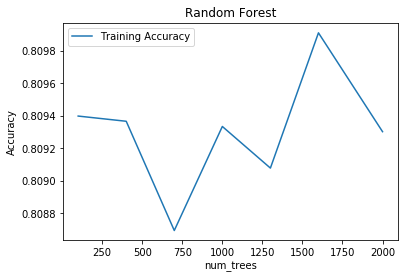

In [16]:
#Generate plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Random Forest')
plt.plot(n_tree, ascore, label='Training Accuracy')
plt.legend()
plt.xlabel('num_trees')
plt.ylabel('Accuracy')
plt.show()

In [22]:
classifier=ensemble.RandomForestClassifier(n_estimators=1600,max_features="sqrt")

In [27]:
classifier.fit(xt,yt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
y_pred=classifier.predict(xt)

In [30]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}'.format(accuracy_score(yt, y_pred)))

Accuracy: 0.999181083017709
